In [95]:
import os
import sys
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

In [87]:
sns.set(style='whitegrid')

In [217]:
LOWER_LIM = 0.9255 * 0 - 1.7434
UPPER_LIM = 0.9255 * 4095 - 1.7434

In [218]:
with open('../data/spectra.dat') as f:
    lines = [line.split('\n')[0] for line in f]
    data_binned = [int(line) for line in lines[lines.index('<<DATA>>')+1:lines.index('<<END>>')]]
    data_roi = sorted([[int(i) for i in line.split(' ')] for line in lines[lines.index('<<ROI>>')+1:lines.index('<<DATA>>')]])

In [236]:
def plot_spectra(lims=None):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(ncols*14,nrows*12))
    G = gridspec.GridSpec(nrows, ncols)
    G.update(hspace=0.35, wspace=0.2)
    axes = [plt.subplot(G[i]) for i in range(ncols)]

    suptitlesize = 50
    titlesize = 40
    axislabelsize = 40
    axisticksize = 30
    
    if lims is not None:
        linewdt = 5
        plt.suptitle('One of the gamma peak of my sample\n'+
                     '(small, yellow crystal)\n',
                     fontweight='bold', fontsize=suptitlesize, y=1.08)
        
    else:
        linewdt = 2
        plt.suptitle('Gamma spectra of my measured sample\n'+
                     '(small, yellow crystal)',
                     fontweight='bold', fontsize=suptitlesize, y=1.08)

    # Linear scale
    axes[0].plot(np.linspace(LOWER_LIM, UPPER_LIM, len(data_binned)), data_binned, lw=linewdt)
    axes[0].set_title('Linear scale', fontsize=titlesize, y=1.02)

    # Log scale
    axes[1].plot(np.linspace(LOWER_LIM, UPPER_LIM, len(data_binned)), data_binned, lw=linewdt)
    axes[1].set_yscale('log')
    axes[1].set_title('Logarithmic scale', fontsize=titlesize, y=1.02)

    for i in range(ncols):
        axes[i].set_xlabel('Energy [keV]', fontsize=axislabelsize)
        axes[i].set_ylabel('Intensity [n]', fontsize=axislabelsize)
        axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)
        if lims is not None:
            assert(np.shape(lims) == (2, 2)), "\'lims\' should be in the shape of (2,2)!"
            axes[i].set_xlim(lims[0][0], lims[0][1])
            axes[i].set_ylim(1, lims[1][1])

    plt.show()

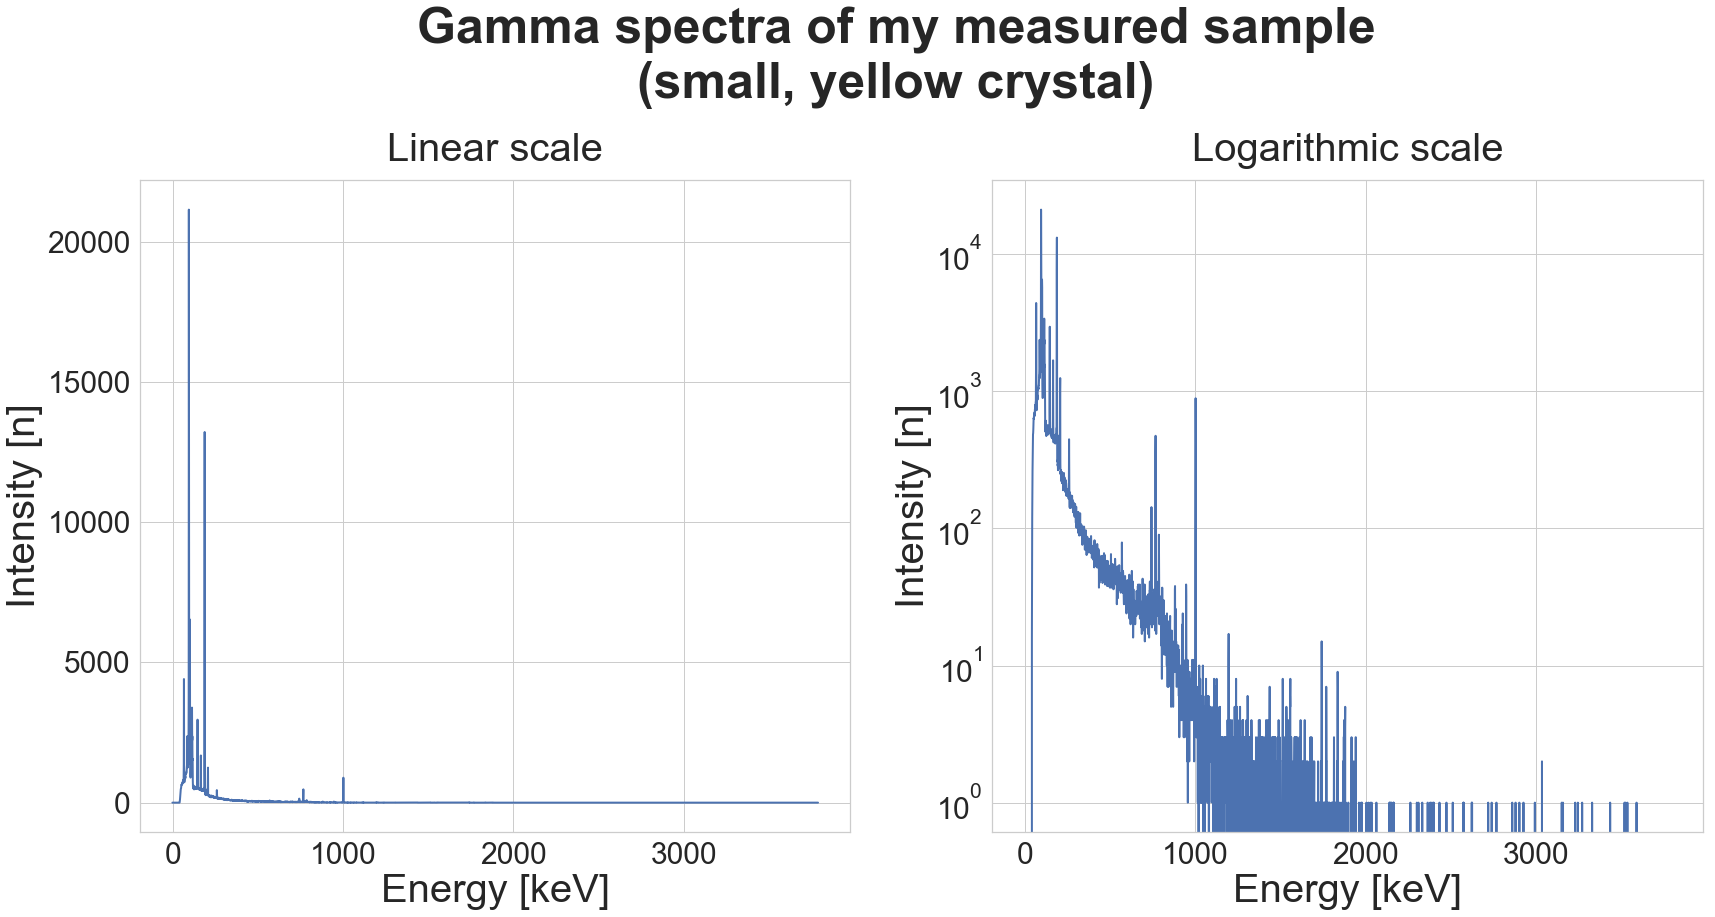

In [237]:
plot_spectra(lims=None)

In [238]:
data_roi_corr = [[0.9255* k - 1.7434 + 3 for k in i] for i in data_roi]

In [239]:
data_roi_corr

[[146.56009999999998, 150.2621],
 [165.9956, 170.6231],
 [188.20759999999999, 191.90959999999998],
 [207.64309999999998, 210.4196],
 [764.7941000000001, 769.4216],
 [999.8711000000001, 1003.5731000000001]]

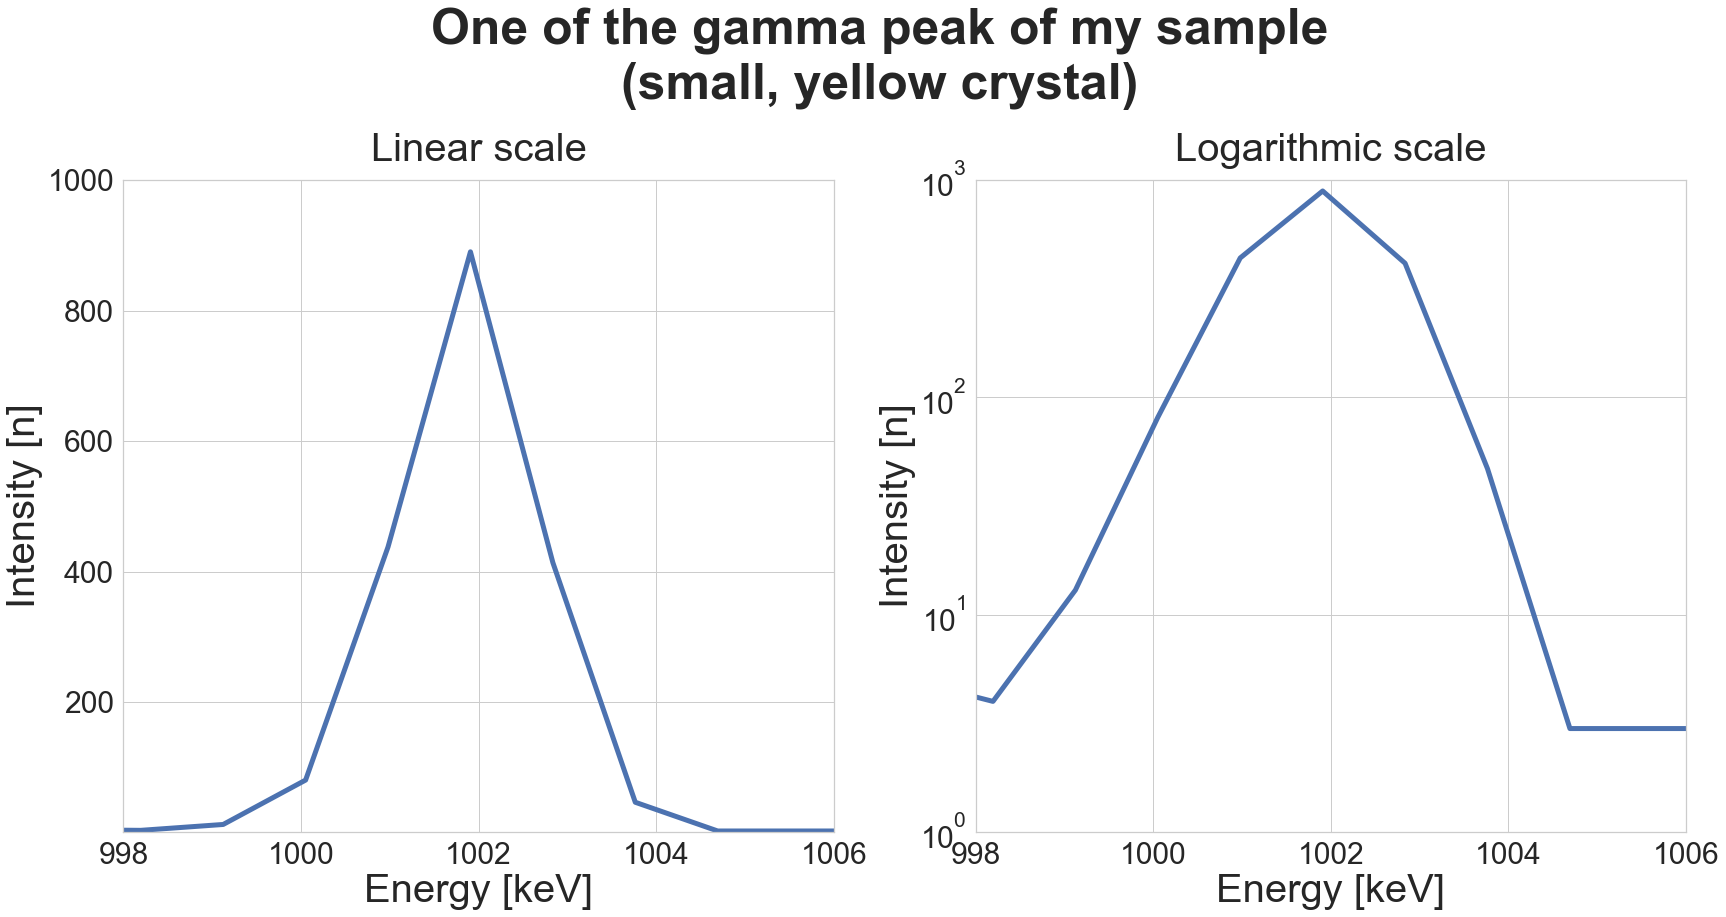

In [240]:
plot_spectra(lims=[[998,1006],[0,1000]])